<a href="https://colab.research.google.com/github/nutapol97/Python-for-DS-AI_Nutapol_T./blob/main/Assignment_Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

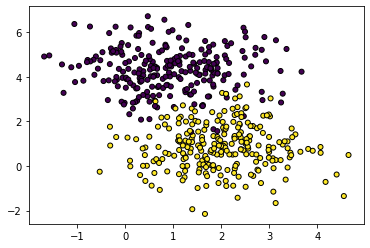

In [69]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

In [72]:
class LogisticRegression:
  def __init__(self, alpha = 0.0001,max_iter = 20000,loss_old = 10000,
               tol = 0.0001,method='Batch'):
    self.alpha=alpha
    self.max_iter=max_iter
    self.loss_old= loss_old
    self.tol=tol
    self.method=method
    
  def sigmoid(self,x):
      return 1 / (1 + np.exp(-x))
          
  def h_theta(self,X_train):
      return self.sigmoid(X_train @ self.w)

  def output(self,pred):
      return np.round(pred)

  def gradient(self,X_train, y_train):
      m = X_train.shape[0]
      h = self.h_theta(X_train)
      error = h - y_train
      
      # putting negative sign for negative log likelihood
      cost = - np.sum(y_train * np.log(h) + (1 - y_train) * np.log(1 - h))
      grad = np.dot(X_train.T, error)
      
      return cost, grad
  
  def mini_batch(self,X_train,y_train):
        rng = default_rng()     # function random not replace number
        sizing = int(0.1* X_train.shape[0])
        random_np=rng.choice(X_train.shape[0], size=sizing, replace=False)
        #random_np= np.random.randint(X_train.shape[0],size=sizing)
        X_train=X_train[random_np,:]
        y_train=y_train[random_np]
        return X_train,y_train
  
  def fit(self,X_train,y_train):
      self.w = np.zeros(X_train.shape[1])
      self.loss=[]
      for i in range(self.max_iter):
        #if self.method == 'mini_batch':
        X,Y = self.mini_batch(X_train,y_train)
        #if self.method == 'sto':
        #X_train,y_train = self.sto(self,X_train,y_train)

        cost, grad = self.gradient(X,Y)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
            self.loss.append(cost)
        self.w = self.w - self.alpha * grad
      return self.w, i
  def predict(self,X_test):
    yhat = np.round(1 / (1 + np.exp(-(X_test @ self.w))))
    return yhat
  def plot(self):
    plt.plot(np.arange(len(self.loss)),self.loss,label= ' Train losses')
    plt.title('Losses')
    plt.xlabel('epoch')
    plt.ylabel('losses')


    

  
  

In [73]:
model=LogisticRegression()
w, i=model.fit(X_train,y_train)


Cost at iteration 0 24.26015131959808
Cost at iteration 500 12.379042304028994
Cost at iteration 1000 8.54895645456322
Cost at iteration 1500 9.354247602833592
Cost at iteration 2000 8.240020201643018
Cost at iteration 2500 7.851649201508915
Cost at iteration 3000 7.328645427147454
Cost at iteration 3500 3.4636476696530245
Cost at iteration 4000 6.335763174753715
Cost at iteration 4500 4.153711160105496
Cost at iteration 5000 3.993864546638124
Cost at iteration 5500 3.7139191479334457
Cost at iteration 6000 5.9960799367383
Cost at iteration 6500 3.5144776559457664
Cost at iteration 7000 2.8666312751616787
Cost at iteration 7500 4.080033689153331
Cost at iteration 8000 7.351951872625172
Cost at iteration 8500 4.517503701637697
Cost at iteration 9000 5.173633207847522
Cost at iteration 9500 2.4946655436868346
Cost at iteration 10000 7.689728937558695
Cost at iteration 10500 6.073679198873843
Cost at iteration 11000 5.191759136930028
Cost at iteration 11500 3.602214342312665
Cost at itera

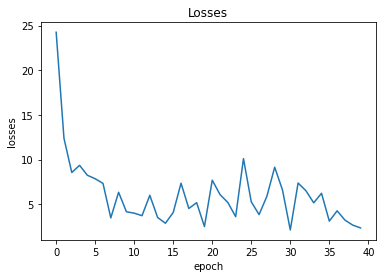

In [74]:
model.plot()

In [113]:
class classification_report:
  def __init__(self,actual,predic):
    self.actual = actual
    self.predic = predic  
    self.TP = sum((self.actual == 1) & (self.predic == 1))
    self.TN =sum((self.actual == 0) & (self.predic == 0))
    self.FP =sum((self.actual == 0) & (self.predic == 1))
    self.FN = sum((self.actual == 1) & (self.predic == 0))

  def acc(self):
    self.acc_r=(self.TP+self.TN)/(self.TP+self.TN+self.FP+self.FN)
    return self.acc_r
  def precision (self):
    self.pre_R=(self.TP)/(self.TP + self.FP)
  
    
    return self.pre_R
  def recall(self):
    self.recall_r=self.TP/ (self.TP+self.FN)
    return  self.recall_r
  def f1 (self):
    self.f1=2*(self.precision()*self.recall())/(self.precision()+self.recall())
    return self.f1
  def report_sum(self):
    self.A1=self.acc()
    self.prec=self.precision()
    self.R1=self.recall()
    self.F1_r=self.f1()
    print('Accuracy : {0}'.format(self.A1))
    print('Precisiom :{0}'.format(self.prec))
    print('Recall : {0}'.format(self.R1))
    print('F1 : {0}'.format(self.F1_r))

In [114]:
yhat= model.predict(X_test)

In [115]:
report_model=classification_report(yhat,y_test)
report_model.report_sum()
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))


Accuracy : 0.9533333333333334
Precisiom :0.9411764705882353
Recall : 0.9552238805970149
F1 : 0.9481481481481482
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        82
           1       0.96      0.94      0.95        68

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

